In [1]:
import pandas as pd
import numpy as np
from osprey.config import Config
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import GPy



/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
dflog = Config('random/config-random.yaml').trial_results()
dflin = Config('random/old/config-random.yaml').trial_results()


Loading config file:     random/config-random.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     random/old/config-random.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [3]:
dflin =dflin.loc[dflin['host']=='compute409.bc4.acrc.priv', :] # I think this is the linear version

In [4]:
dflog['m'] = dflog['parameters'].apply(lambda x: x['cluster__n_bins_per_feature'])
dflin['m'] = dflin['parameters'].apply(lambda x: x['cluster__n_bins_per_feature'])


dflog = dflog.loc[dflog['m']>=20, :]
dflin = dflin.loc[dflin['m']>=20, :]



In [5]:
dflin.head()

,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user,m
0,2018-01-16 14:47:55.837650,5dcc160f5f151e84bbbd61c161b3ec484025986b,1970-01-01 00:00:07.134648,compute409.bc4.acrc.priv,1,1.931713,1.931750,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__score_k': 2, 'cluster__n_bins_per_featu...",random_k2,2018-01-16 14:47:48.703002,SUCCEEDED,"[1.9319641533401182, 1.9306060884358682, 1.932...",None,"[1.9317469656939217, 1.9328378337581502, 1.930...",ra15808,197
1,2018-01-16 14:48:05.538271,5dcc160f5f151e84bbbd61c161b3ec484025986b,1970-01-01 00:00:09.676702,compute409.bc4.acrc.priv,2,1.931413,1.931895,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__score_k': 2, 'cluster__n_bins_per_featu...",random_k2,2018-01-16 14:47:55.861569,SUCCEEDED,"[1.930576803415273, 1.930192486730562, 1.93221...",None,"[1.9328795773844427, 1.9317976880199463, 1.930...",ra15808,555
2,2018-01-16 14:48:11.735623,5dcc160f5f151e84bbbd61c161b3ec484025986b,1970-01-01 00:00:06.176964,compute409.bc4.acrc.priv,3,1.931277,1.931971,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__score_k': 2, 'cluster__n_bins_per_featu...",random_k2,2018-01-16 14:48:05.558659,SUCCEEDED,"[1.9314587250772277, 1.9319592182225187, 1.932...",None,"[1.9321706243853742, 1.9313673612486721, 1.931...",ra15808,163
3,2018-01-16 14:48:18.878637,5dcc160f5f151e84bbbd61c161b3ec484025986b,1970-01-01 00:00:07.034715,compute409.bc4.acrc.priv,4,1.931170,1.932010,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__score_k': 2, 'cluster__n_bins_per_featu...",random_k2,2018-01-16 14:48:11.843922,SUCCEEDED,"[1.9313182905453985, 1.930376300493431, 1.9321...",None,"[1.932397743801927, 1.9317389031182344, 1.9306...",ra15808,280
4,2018-01-16 14:48:27.536531,5dcc160f5f151e84bbbd61c161b3ec484025986b,1970-01-01 00:00:08.634720,compute409.bc4.acrc.priv,5,1.931372,1.931942,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__score_k': 2, 'cluster__n_bins_per_featu...",random_k2,2018-01-16 14:48:18.901811,SUCCEEDED,"[1.9314240826020554, 1.929572451253615, 1.9315...",None,"[1.9316928420908837, 1.9335161863992878, 1.931...",ra15808,399


In [6]:
print(dflin.shape)
print(dflog.shape)


(99, 18)
(78, 18)


# Calculate EI and demonstrate difference in warps. 

In [7]:
from scipy.stats import norm
def _ei(model, x):
    y_mean, y_var = model.predict(x)
    y_std = np.sqrt(y_var)
    y_best = model.Y.max(axis=0)
    z = (y_mean - y_best)/y_std
    result = y_std*(z*norm.cdf(z) + norm.pdf(z))
    return result

In [107]:
np.random.seed(42)
N = 70
idx = np.random.choice(np.arange(dflin.shape[0]), N, replace=False )
ylin = dflin['mean_test_score'].values
Xlin = dflin['m'].values
ylin = ylin[idx, np.newaxis]
Xlin = Xlin[idx, np.newaxis]

In [108]:
idx = np.random.choice(np.arange(dflog.shape[0]), N, replace=False )

ylog = dflog['mean_test_score'].values
Xlog = dflog['m'].values

ylog = ylog[idx, np.newaxis]
Xlog = Xlog[idx, np.newaxis]

(20, 1000)

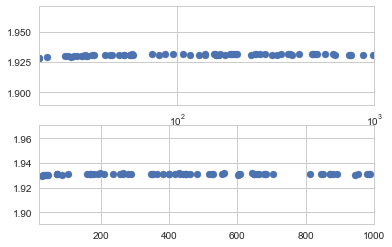

In [109]:
fig, axes = plt.subplots(2)
axes[0].scatter(Xlog, ylog)
axes[0].set_xscale('log')

axes[0].set_xlim((20, 1000))

axes[1].scatter(Xlin, ylin)
axes[1].set_xlim((20,1000))


## linear warp

In [110]:
kernel = GPy.kern.Matern52(input_dim=1)
mlin = GPy.models.GPRegression(Xlin,ylin,kernel)
_ = mlin.optimize_restarts(num_restarts = 20, verbose=False)


xlin = np.arange(20,1001,10)[:,np.newaxis]
mulin, varlin = mlin.predict(xlin)
eilin = _ei(mlin, xlin)


lblin = (mulin - 1.96*np.sqrt(varlin)).reshape(-1)
ublin = (mulin + 1.96*np.sqrt(varlin)).reshape(-1)
xlin= xlin.reshape(-1)  

(1.9285, 1.932)

 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


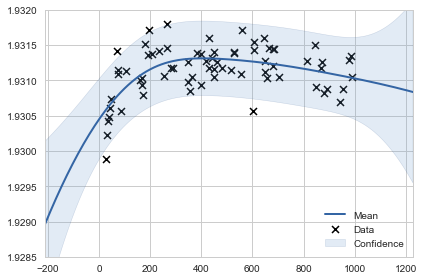

In [111]:
mlin.plot()
plt.ylim(1.9285, 1.9320)

## log warp

In [112]:
Xlog = np.log(Xlin)
ylog = ylin
kernellog = GPy.kern.Matern52(input_dim=1)
mlog = GPy.models.GPRegression(Xlog,ylog,kernellog)
_ = mlog.optimize_restarts(num_restarts = 20, verbose=False)


xlog = np.log(np.arange(20,1001,10)[:,np.newaxis])
mulog, varlog = mlog.predict(xlog)
eilog = _ei(mlog, xlog)


lblog = (mulog - 1.96*np.sqrt(varlog)).reshape(-1)
ublog = (mulog + 1.96*np.sqrt(varlog)).reshape(-1)
xlog = xlog.reshape(-1) 

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
eilin = scaler.fit_transform(eilin)
eilog = scaler.fit_transform(eilog)

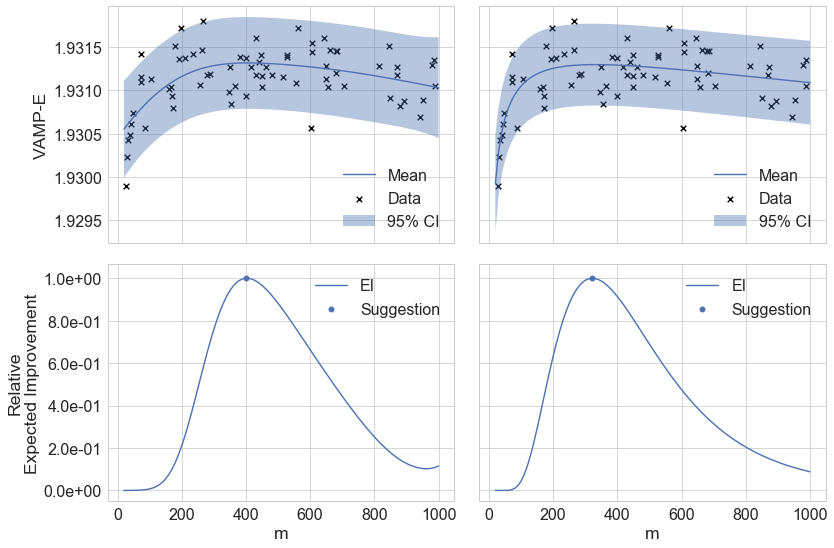

In [114]:
def plot_gp(ax, x,X, y, mu, lb, ub,log=False):
    if log: 
        x = np.exp(x)
        X = np.exp(X)
#         ax.set_xscale('log')
        
    ax.plot(x, mu, label='Mean')
    ax.scatter(X,y, label='Data', c='k', marker='x')
    ax.fill_between(x,lb, ub, alpha=0.4, label='95% CI')
    ax.legend()
#     ax.set_ylabel('VAMP-E')
    return ax
    
def plot_ei(ax, ei, x, log=False):
    if log:
        x = np.exp(x)
#         ax.set_xscale('log')      
        
    ax.plot(x,ei, label='EI')
    ax.scatter(x[np.argmax(ei)], np.max(ei), label='Suggestion')
    ax.set_xlabel('m')    
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1e}'))
#     ax.set_ylabel('Relative\nExpected Improvement')
    ax.legend()
    return ax



from matplotlib.ticker import StrMethodFormatter

with sns.plotting_context('paper', font_scale=2):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12,8))
    plot_gp(axes[0,0], xlin, Xlin, ylin, mulin, lblin, ublin)
    axes[0,0].set_ylabel('VAMP-E')
    plot_gp(axes[0,1], xlog, Xlog, ylog, mulog, lblog, ublog, log=True)
    
    plot_ei(axes[1,0], eilin, xlin)
    plot_ei(axes[1,1], eilog, xlog, log=True)
    axes[1,0].set_ylabel('Relative\nExpected Improvement')


    plt.tight_layout()
#     plt.savefig('../figures/compare_warp.pdf')



In [115]:
mlin

GP_regression.,value,constraints,priors
Mat52.variance,2.1131184819019873,+ve,
Mat52.lengthscale,18135.086053463125,+ve,
Gaussian_noise.variance,6.968200273889297e-08,+ve,


In [116]:
mlog

GP_regression.,value,constraints,priors
Mat52.variance,1.874196609947244,+ve,
Mat52.lengthscale,164.69557102442195,+ve,
Gaussian_noise.variance,5.599697386741409e-08,+ve,
